<a id='eda'></a>


<a id='feat'></a>
### About Dataset

The dataset used in this study is the *Default of credit card clients* from the UCI machine learning repository, available at the following [link](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). <br> It consists of **30000 observations** that represent distinct credit card clients. Each observation has **24 attributes** that contain information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The first group of variables contains information about the **client personal information**:

1. `ID`: ID of each client, categorical variable
2. `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. `SEX`: Gender, categorical variable (1=male, 2=female)
4. `EDUCATION`: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. `MARRIAGE`: Marital status, categorical variable (1=married, 2=single, 3=others)
6. `AGE`: Age in years, numerical variable

The following attributes contains information about the **delay of the past payment** referred to a specific month:

7. `PAY_0`: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. `PAY_2`: Repayment status in August 2005 (same scale as before)
9. `PAY_3`: Repayment status in July 2005 (same scale as before)
10. `PAY_4`: Repayment status in June 2005 (same scale as before)
11. `PAY_5`: Repayment status in May 2005 (same scale as before)
12. `PAY_6`: Repayment status in April 2005 (same scale as before)

Other variables instead consider the information related to the **amount of bill statement** (i.e. a monthly report that credit card companies issue to credit card holders in a specific month):

13. `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
14. `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
15. `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
16. `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
17. `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
18. `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

The following variables instead consider the **amount of previous payment** in a specific month:

19. `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
20. `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
21. `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
22. `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
23. `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
24. `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

The last variable is the one to be predicted:

25. `default.payment.next.month`: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../Training_InputFileFromDB/InputFile.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# There is no missing values in this dataset

In [6]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


The dataset has lots of mistakes
For example, the following criticities can be observed: 
- the column name `PAY_0` should be renamed in `PAY_1`;
- about `EDUCATION` and `MARRIAGE` there are some undocumented categories;
- the columns `PAY_n` have a minimum in -2 (undocumented) and a maximum equal to 8. So, it is likely that these attributes need to be rescaled.
<a id='data_cleaning'></a>
### 2.2 Data Cleaning

The presence of errors in the dataset can be addressed in two ways: 
1. deleting of the rows associated with an error (paying attention to the number of lines with respect to the total number of observations);
2. with a correction of the wrong attribute.

In our case the first method is applied to the categorical variables, by safely removing the unknown categories (since the total number of anomalous values is 399):
- Regarding the attribute `EDUCATION` there are three categories not listed in the description of the dataset provided by the UCI website that corresponds to 0, 5, and 6.
- While for `MARRIAGE` we can notice the presence of category 0 that does not correspond to any categories previously described.

while the second approach is applied to the `PAY_n` features, correcting them by adding 1 to each attribute and grouping together the resulting values of '0' and '-1' (since 0 does not correspond to any value previously described).

In [8]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [9]:
# removing the id column
df.drop(["ID"], axis=1, inplace=True)

In [10]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)
print(df.EDUCATION.value_counts())

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64


In [12]:
df['MARRIAGE'].replace(0, 3, inplace=True)
print(df.MARRIAGE.value_counts())

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


In [13]:
def separate_target_feature(data, label_column_name):
    try:
        X = data.drop(labels=label_column_name,axis=1)  # drop the columns specified and separate the feature columns
        Y = data[label_column_name]  # Filter the Label columns
        return X, Y
    except Exception as e:
        raise Exception()

def handle_imbalanced_data(x,y):
    try:
        rdsmple = SMOTETomek() #Using Oversampling balancing the dataset
        x_sampled, y_sampled = rdsmple.fit_resample(x, y)
        return x_sampled, y_sampled
    except Exception as e:
        raise Exception()

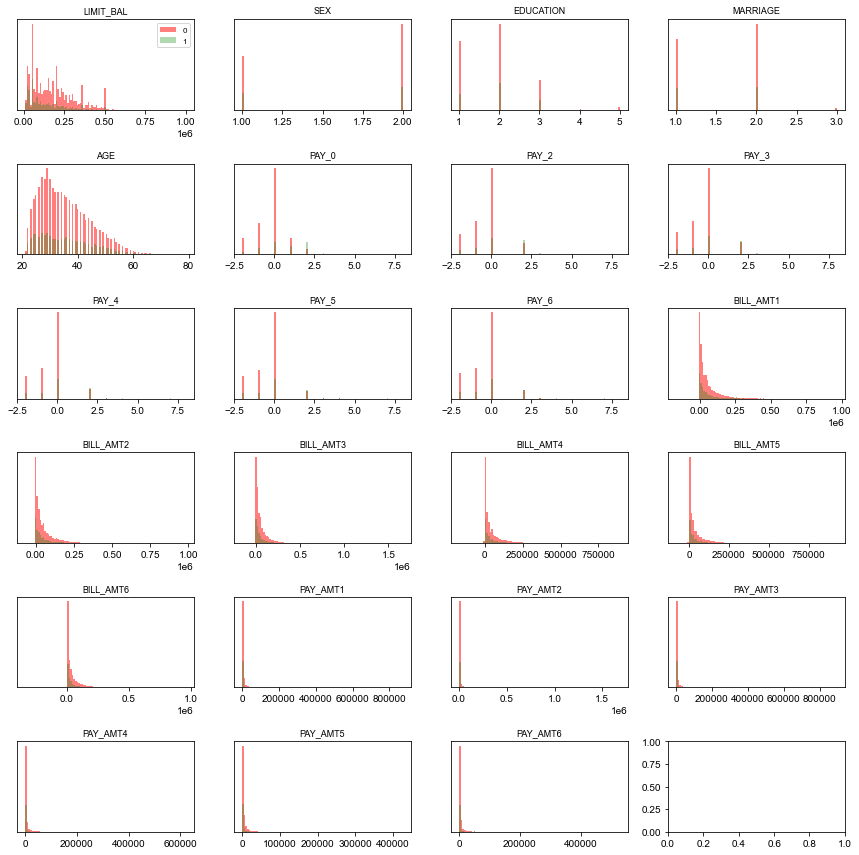

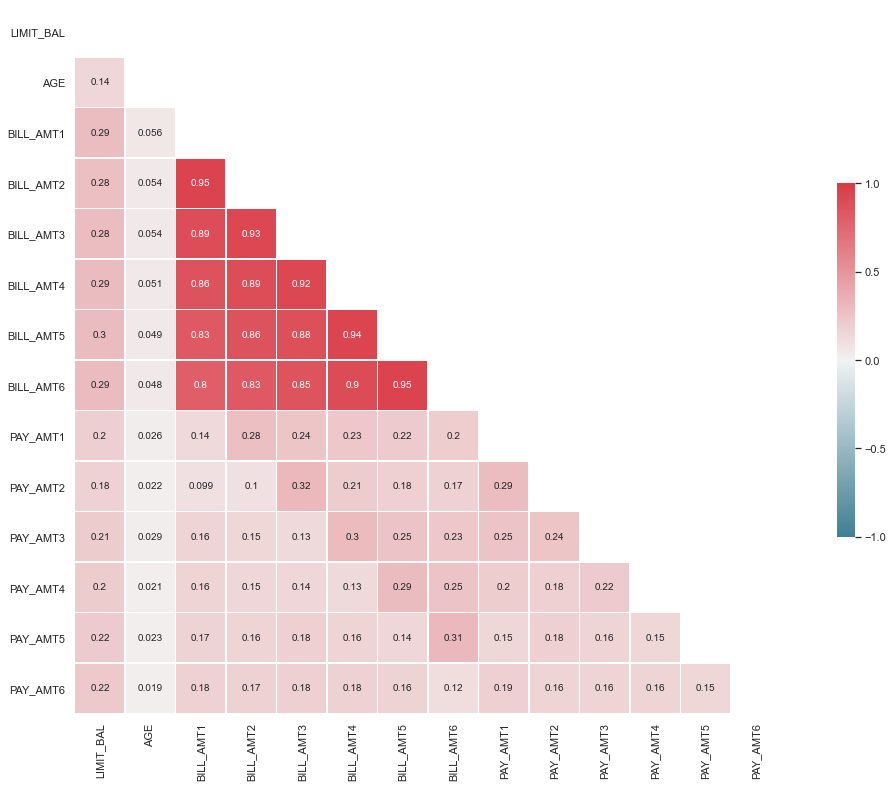

In [14]:
data = df.copy()
# HISTOGRAMS PLOTS FOR FEATURES IMPORTANCE
fig, axes= plt.subplots(6,4, figsize=(12,12))
non_def = data[data['default payment next month']==0]
default = data[data['default payment next month']==1]
ax = axes.ravel()

for i,label in enumerate(data.columns[:-1]):
    _,bins = np.histogram(data[label],bins=100)
    ax[i].hist(non_def[label],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(default[label],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())


ax[0].legend([0,1],loc='best',fontsize=8)
plt.tight_layout() # let's make good plots
#plt.show()
# Correlation matrix
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = data[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
        square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=10)
# plt.show()
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

In [15]:
df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853767,0.784391,1.0,1.00,2.0,2.00,5.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

In [17]:
df.rename(
                columns={"default payment next month": "default_payment_next_month"}, inplace=True
            )
df["default_payment_next_month"].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

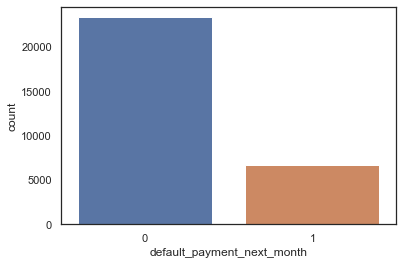

In [18]:
sns.countplot(df["default_payment_next_month"])
plt.show()

##### FROM THE ABOVE OBSERVATION WE CAN ABLE TO KNOW THAT THE ABOVE DATA IS IMBALANCED.


In [20]:
X, Y = separate_target_feature(df, 'default_payment_next_month')
X.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BILL_AMT2'>

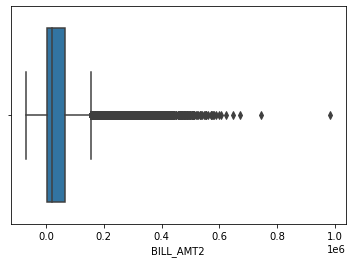

In [13]:
sns.boxplot(df['BILL_AMT2'])

#### Balancing the dataset

In [21]:
from imblearn.combine import SMOTETomek
X, Y = handle_imbalanced_data(X, Y)

In [22]:
X.shape,Y.shape

((45460, 23), (45460,))

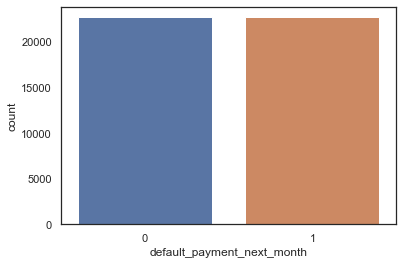

In [23]:
from collections import Counter
Counter(Y)
sns.countplot(Y)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

### Naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
pred_y=gnb.fit(X_train,y_train).predict(X_test)
ac=accuracy_score(y_test, pred_y)
print(ac)

0.5502273060566065


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [31]:
#finding the best parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.555, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.555, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.545, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.555, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.553, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.561, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... var_smoothing=0.1, score=0.553, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.551, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.553, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.544, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.551, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.549, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.572, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [32]:
grid.best_estimator_

GaussianNB(var_smoothing=1e-11)

In [33]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(X_train,y_train).predict(X_test)

In [34]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.5639389939873882

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
scaled_train_df = X_tra
model = LogisticRegression(solver='liblinear',random_state=50)
model.fit(scaled_train_df,y_train)
pred_y = model.predict(scaled_test_df)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      6797
           1       0.61      0.75      0.67      6841

    accuracy                           0.63     13638
   macro avg       0.64      0.63      0.63     13638
weighted avg       0.64      0.63      0.63     13638

[[3491 3306]
 [1694 5147]]


### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(scaled_train_df,y_train)
pred_y = model.predict(scaled_test_df)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.82      0.62      0.70      6797
           1       0.69      0.87      0.77      6841

    accuracy                           0.74     13638
   macro avg       0.76      0.74      0.74     13638
weighted avg       0.76      0.74      0.74     13638

[[4188 2609]
 [ 911 5930]]


In [46]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_train_df,y_train)
    pred_i = knn.predict(scaled_test_df)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

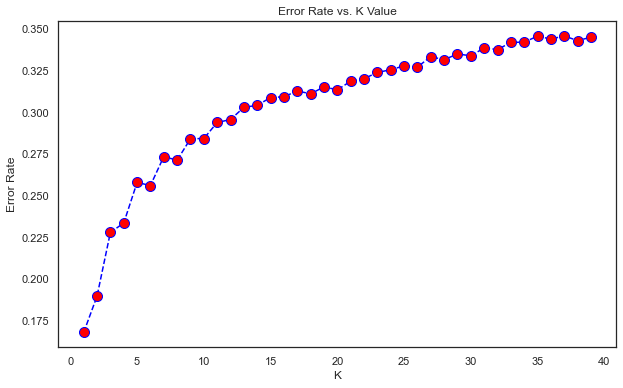

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_train_df,y_train)
pred = knn.predict(scaled_test_df)


print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[4932 1865]
 [ 429 6412]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      6797
           1       0.77      0.94      0.85      6841

    accuracy                           0.83     13638
   macro avg       0.85      0.83      0.83     13638
weighted avg       0.85      0.83      0.83     13638



In [49]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(scaled_train_df,y_train)
pred = knn.predict(scaled_test_df)


print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[5506 1291]
 [1300 5541]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6797
           1       0.81      0.81      0.81      6841

    accuracy                           0.81     13638
   macro avg       0.81      0.81      0.81     13638
weighted avg       0.81      0.81      0.81     13638



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,random_state=30)
model.fit(scaled_train_df,y_train)
pred = model.predict(scaled_test_df)
print("Classification Report \n")
print(classification_report(y_test,pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6797
           1       0.85      0.82      0.83      6841

    accuracy                           0.84     13638
   macro avg       0.84      0.84      0.84     13638
weighted avg       0.84      0.84      0.84     13638

Confusion Matrix

[[5800  997]
 [1225 5616]]


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(scaled_train_df, y_train)
clf.cv_results_

{'mean_fit_time': array([0.35935352, 0.51212404]),
 'std_fit_time': array([0.00754878, 0.00529385]),
 'mean_score_time': array([0.0021003 , 0.00201995]),
 'std_score_time': array([3.00316533e-04, 5.63232343e-05]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.73264216, 0.7423814 ]),
 'split1_test_score': array([0.76343073, 0.7687716 ]),
 'split2_test_score': array([0.75487115, 0.74795726]),
 'split3_test_score': array([0.74450031, 0.74135764]),
 'split4_test_score': array([0.73758642, 0.7416719 ]),
 'split5_test_score': array([0.7319296 , 0.73570082]),
 'split6_test_score': array([0.74104337, 0.74355751]),
 'split7_test_score': array([0.74261471, 0.74198617]),
 'split8_test_score': array([0.73915776, 0.75298554]),
 'split9_test_score': array([0.74607165, 0.75078567]),
 'mean_test_score': array([0

In [52]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]

,param_criterion,mean_test_score
0,gini,0.743385
1,entropy,0.746716


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion="gini",random_state=3,max_depth=1)
model.fit(scaled_train_df,y_train)
predicted_values = model.predict(scaled_test_df)
x = accuracy_score(y_test, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  65.86009678838539
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      6797
           1       0.76      0.46      0.58      6841

    accuracy                           0.66     13638
   macro avg       0.69      0.66      0.65     13638
weighted avg       0.69      0.66      0.64     13638



### Support Vector Machine

In [54]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(scaled_train_df,y_train)
predicted_values = SVM.predict(scaled_test_df)
x = accuracy_score(y_test, predicted_values)
print("SVM's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.5217773867135944
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      6797
           1       0.84      0.06      0.11      6841

    accuracy                           0.52     13638
   macro avg       0.67      0.52      0.39     13638
weighted avg       0.67      0.52      0.39     13638



### Saving the best model
##### From the above results, random forest performs best

In [55]:
from sklearn.metrics import roc_auc_score,accuracy_score
try:
    # creating RandomForestClassifier model
    rf = RandomForestClassifier()
    # training the RandomForestClassifier model
    rf.fit(X_train, y_train)
    prediction_RF = rf.predict(X_test)# Predictions using the Random Forest Model
    if len(y_test.unique()) == 1:  # if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        RF_score = accuracy_score(y_test, prediction_RF)
        print('Accuracy for RANDOM FOREST:' + str(RF_score))
    else:
        RF_score = roc_auc_score(y_test, prediction_RF)#AUC for Random Forest
        print('Accuracy for RANDOM FOREST:' + str(RF_score))

except Exception as e:
    raise Exception()

Accuracy for RANDOM FOREST:0.842175818686787


In [61]:
with open('../models/random_forest.sav','wb') as f:
    pickle.dump(rf, f) 